In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
sd=pd.read_csv("GOOGL_prices.csv")
sd.head()

,Date,Open,High,Low,Close
0,1/3/2006,211.47,218.05,209.32,217.83
1,1/4/2006,222.17,224.70,220.09,222.84
2,1/5/2006,223.22,226.00,220.97,225.85
3,1/6/2006,228.66,235.49,226.85,233.06
4,1/9/2006,233.44,236.94,230.70,233.68


In [28]:
sd.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [30]:
sd.duplicated()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [32]:
sd.describe()

,Open,High,Low,Close
count,5.000000,5.000000,5.000000,5.000000
mean,223.792000,228.236000,221.586000,226.652000
std,8.239707,7.899964,8.121683,6.772324
min,211.470000,218.050000,209.320000,217.830000
25%,222.170000,224.700000,220.090000,222.840000
50%,223.220000,226.000000,220.970000,225.850000
75%,228.660000,235.490000,226.850000,233.060000
max,233.440000,236.940000,230.700000,233.680000


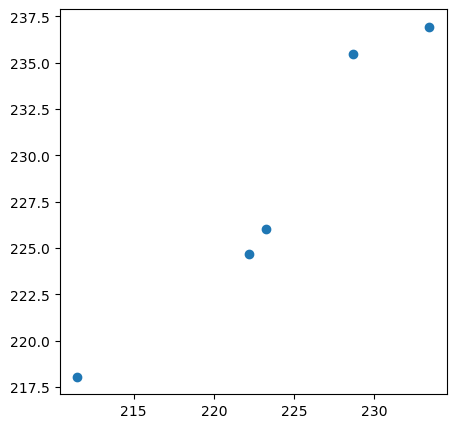

In [34]:
plt.figure(figsize=(5,5))
plt.scatter(x=sd["Open"],y=sd["High"])
plt.show()

In [36]:
sd.shape

(5, 5)

In [38]:
x=sd[["Open","High","Low"]]
x

,Open,High,Low
0,211.47,218.05,209.32
1,222.17,224.70,220.09
2,223.22,226.00,220.97
3,228.66,235.49,226.85
4,233.44,236.94,230.70


In [40]:
y=sd["Close"]
y

0    217.83
1    222.84
2    225.85
3    233.06
4    233.68
Name: Close, dtype: float64

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.3,random_state=0)
x_train

,Open,High,Low
4,233.44,236.94,230.7


In [46]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaler=scaler.fit_transform(x_train)
x_test_scaler=scaler.fit_transform(x_test)
x_train_scaler=pd.DataFrame(x_train_scaler)
x_test_scaler=pd.DataFrame(x_test_scaler)

In [48]:
x_test_scaler

,0,1,2
0,0.295379,-0.009641,0.262851
1,-1.590872,-1.287014,-1.579085
2,0.126820,-0.218519,0.123718
3,1.168673,1.515174,1.192516


In [50]:
x_test_scaler.describe()

,0,1,2
count,4.000000,4.000000,4.000000e+00
mean,0.000000,0.000000,-1.110223e-15
std,1.154701,1.154701,1.154701e+00
min,-1.590872,-1.287014,-1.579085e+00
25%,-0.302603,-0.485643,-3.019827e-01
50%,0.211100,-0.114080,1.932848e-01
75%,0.513702,0.371563,4.952675e-01
max,1.168673,1.515174,1.192516e+00


In [52]:
np.round(x_test_scaler.describe())

,0,1,2
count,4.0,4.0,4.0
mean,0.0,0.0,-0.0
std,1.0,1.0,1.0
min,-2.0,-1.0,-2.0
25%,-0.0,-0.0,-0.0
50%,0.0,-0.0,0.0
75%,1.0,0.0,0.0
max,1.0,2.0,1.0


In [54]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [56]:
reg.fit(x_train_scaler,y_train)

LinearRegression()

In [58]:
reg.score(x,y)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


-1.346164353723819

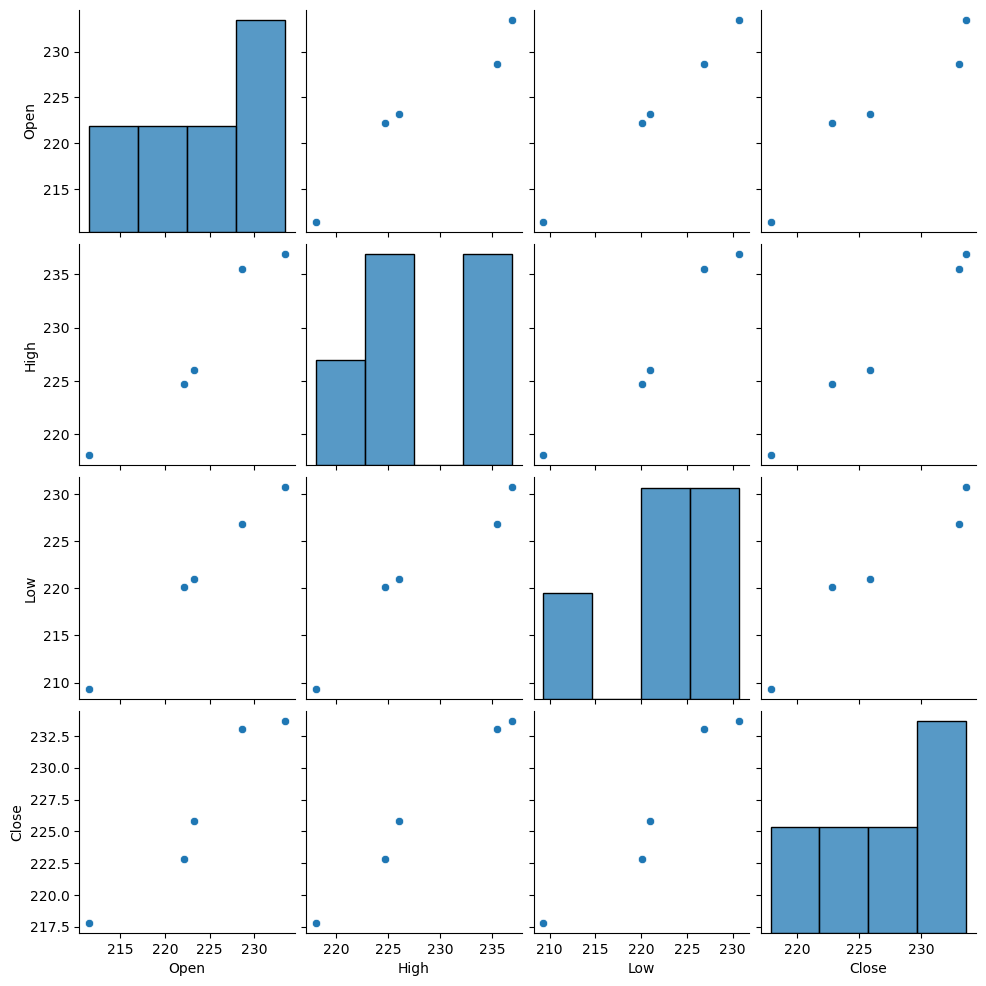

In [60]:
sns.pairplot(sd)
plt.show()

<Axes: ylabel='count'>

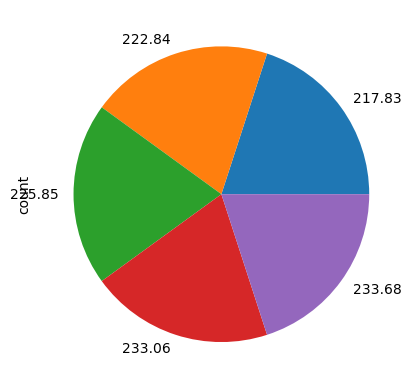

In [61]:
sd["Close"].value_counts().plot(kind="pie")

In [62]:
correl=sd[["High","Low"]].corr()
correl

,High,Low
High,1.000000,0.970691
Low,0.970691,1.000000


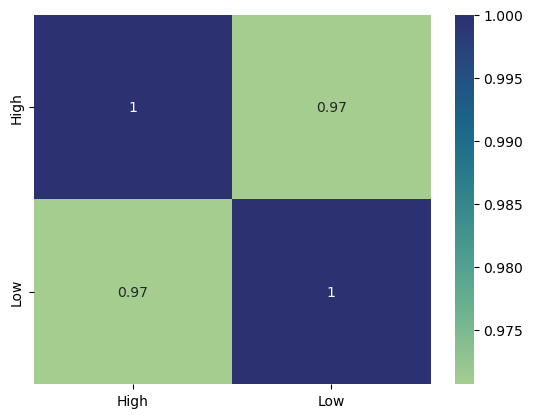

In [66]:
sns.heatmap(correl,cmap="crest",annot=True)
plt.show()

In [ ]:
hlo